# Lecture 3d

## A Simple Time-Series Regression



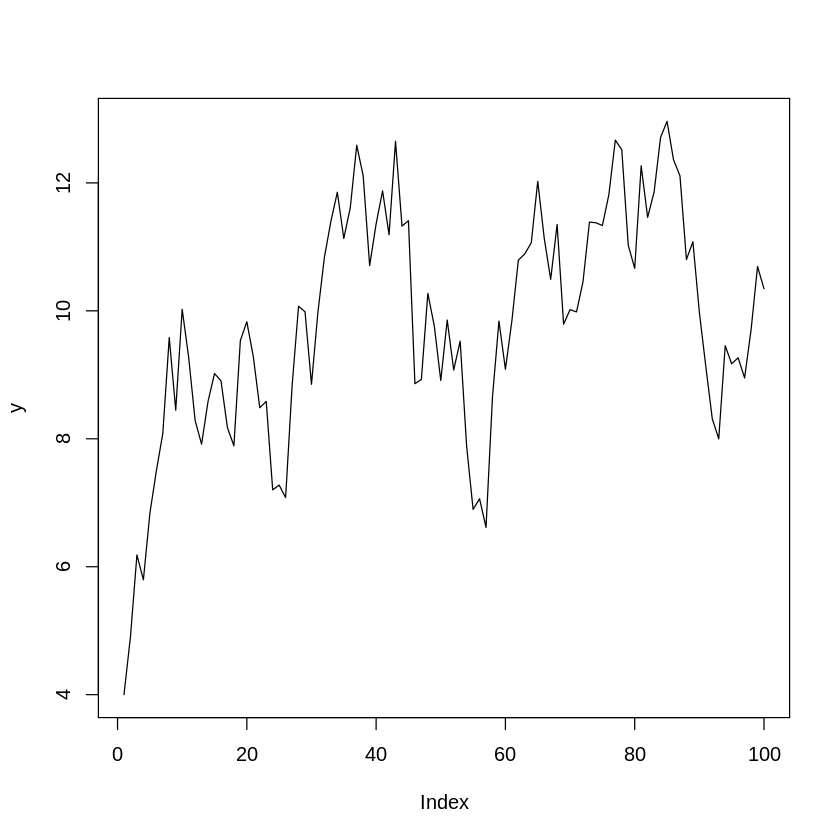

In [7]:
set.seed(3) #set random seed so that the simulation is reproducible

n <- 100 #number of observations in sample

b0 <- 2
b1 <- .8

e <- rnorm(n,0,1) #draw sample of errors

y<-rep(4, n) #initialize y-vector, in particular y[1] is 6


for (t in 2:n){
    y[t] <- b0+ b1*y[t-1]+ e[t]  #generate the time-series
}

plot(y,type="l")

When $\beta_1<1$ this process limits.

When $\beta_1=1$ this process is called a random walk.

When $\beta_1>1$ this process is amplified.

Try changing $\beta_1$ above and see how the process changes. What if it is negative?

In [ ]:
#Estimate the model with a Lagged Dependent Variable
lm.fit=lm(y[2:n]~y[1:n-1]) #fit the linear model
summary(lm.fit) #display


Call:
lm(formula = y[2:n] ~ y[1:n - 1])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28381 -0.70789  0.02243  0.72355  1.71549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02150    0.08785   0.245    0.807    
y[1:n - 1]   0.79781    0.05602  14.242   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8591 on 97 degrees of freedom
Multiple R-squared:  0.6765,	Adjusted R-squared:  0.6732 
F-statistic: 202.8 on 1 and 97 DF,  p-value: < 2.2e-16


Note that a linear regression is really only appropriate when $\beta_1 <1$. This will be the case for most datasets.

Using the dynlm package

In [ ]:
if (!require(dynlm)) install.packages("dynlm")
library("dynlm")

Loading required package: dynlm

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:

    dfm.fit <- dynlm(y ~ L(y, 1))
    summary(dfm.fit)


    dfm.fit <- dynlm(y ~ L(y, 1) + L(y, 2))
    summary(dfm.fit)

Warning message in summary.lm(dfm.fit):
“essentially perfect fit: summary may be unreliable”



Time series regression with "numeric" data:
Start = 1, End = 100

Call:
dynlm(formula = y ~ L(y, 1))

Residuals:
       Min         1Q     Median         3Q        Max 
-4.775e-16 -6.100e-17 -4.070e-17  1.400e-18  3.459e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -4.441e-17  3.703e-17 -1.199e+00    0.233    
L(y, 1)      1.000e+00  2.372e-17  4.215e+16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.639e-16 on 98 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.777e+33 on 1 and 98 DF,  p-value: < 2.2e-16


Warning message in summary.lm(dfm.fit):
“essentially perfect fit: summary may be unreliable”



Time series regression with "numeric" data:
Start = 1, End = 100

Call:
dynlm(formula = y ~ L(y, 1) + L(y, 2))

Residuals:
       Min         1Q     Median         3Q        Max 
-4.775e-16 -6.100e-17 -4.070e-17  1.400e-18  3.459e-15 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -4.441e-17  3.703e-17 -1.199e+00    0.233    
L(y, 1)      1.000e+00  2.372e-17  4.215e+16   <2e-16 ***
L(y, 2)             NA         NA         NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.639e-16 on 98 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.777e+33 on 1 and 98 DF,  p-value: < 2.2e-16
